# Solving the Laplace Equation

The Laplace equation does not have a time-dependence as some of the previous equations did. Instead, the solution yields the steady-state condition of the system under the particular boundary conditions.

Because of this, the Poisson equation is discretized in each direction using a centered-difference scheme, which is more representative of the physics that we are attempting to model.

The Laplace equation is: 

$$\frac{\partial ^2 p}{\partial x^2} + \frac{\partial ^2 p}{\partial y^2} = 0$$

which can be discretized as :

$$\frac{p_{i+1, j}^n - 2p_{i,j}^n + p_{i-1,j}^n}{\Delta x^2} + \frac{p_{i,j+1}^n - 2p_{i,j}^n + p_{i, j-1}^n}{\Delta y^2} = 0$$

Solving this for the center-point of the scheme:

$$p_{i,j}^n = \frac{\Delta y^2(p_{i+1,j}^n+p_{i-1,j}^n)+\Delta x^2(p_{i,j+1}^n + p_{i,j-1}^n)}{2(\Delta x^2 + \Delta y^2)}$$

This exercise will seek to iterate through loops to solve the equation, and then do the same thing using array operations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import time
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [3]:
# Variable declarations
nx = 41
ny = 41
Lx = 2
Ly = 1
dx = Lx / (nx - 1)
dy = Ly / (ny - 1)
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x, y)
max_iter = 10000
l1norm_target = 1e-4

Text(0.5, 0, 'y')

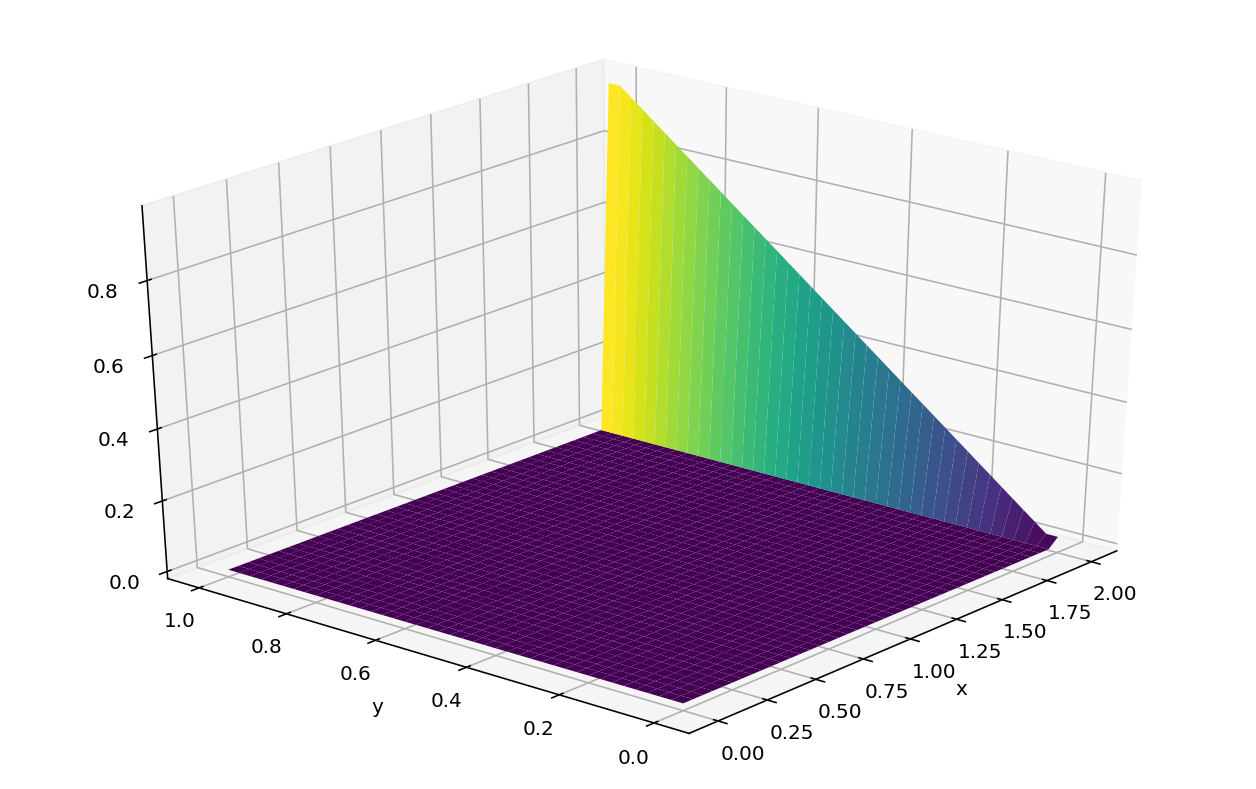

In [4]:
# Initialize solution array and set boundary conditions
p = np.zeros((ny, nx))
p[:, 0] = 0           # BC at x = 0
p[:, -1] = y           # BC at x = 2
p[0, :] = p[1, :]     # dp/dy = 0 at y = 0 (forward difference)
p[-1, :] = p[-2, :]   # dp/dy = 0 at y = 1 (backward difference)

fig= plt.figure(figsize=(11,7))
ax = fig.gca(projection='3d')
init_cond = ax.plot_surface(X, Y, p, cmap=cm.viridis)
ax.view_init(30, 220)
ax.set_xlabel('x')
ax.set_ylabel('y')

In [5]:
# Loop over indices i, j
start = time.time()
p = np.zeros((ny, nx))
n = 0
l1norm = np.inf
while (l1norm > l1norm_target) & (n < max_iter):
    pn = np.copy(p)
    for j in range(1, ny-1):
        for i in range(1, nx-1):
            p[j,i] = (dy**2*(pn[j,i+1]+pn[j,i-1]) + dx**2*(pn[j+1,i]+pn[j-1,i]))/(2*(dx**2+dy**2))
            p[:, 0] = 0           # BC at x = 0
            p[:, -1] = y           # BC at x = 2
            p[0, :] = p[1, :]     # dp/dy = 0 at y = 0 (forward difference)
            p[-1, :] = p[-2, :]   # dp/dy = 0 at y = 1 (backward difference)
    l1norm = (np.sum(np.abs(p[:]) - np.abs(pn[:])))/np.sum(np.abs(pn[:]))
    n += 1
finish = time.time()
print(f'Convergence criteria met. Breaking. Final L1 norm: {l1norm:.4f}. Iterations: {n}')
print(f'Time to run: {finish-start:.2f} seconds')

<ipython-input-5-66550351a3c8>:15: RuntimeWarning: divide by zero encountered in double_scalars
  l1norm = (np.sum(np.abs(p[:]) - np.abs(pn[:])))/np.sum(np.abs(pn[:]))


Convergence criteria met. Breaking. Final L1 norm: 0.0001. Iterations: 2813
Time to run: 17.31 seconds


Text(0.5, 0, 'y')

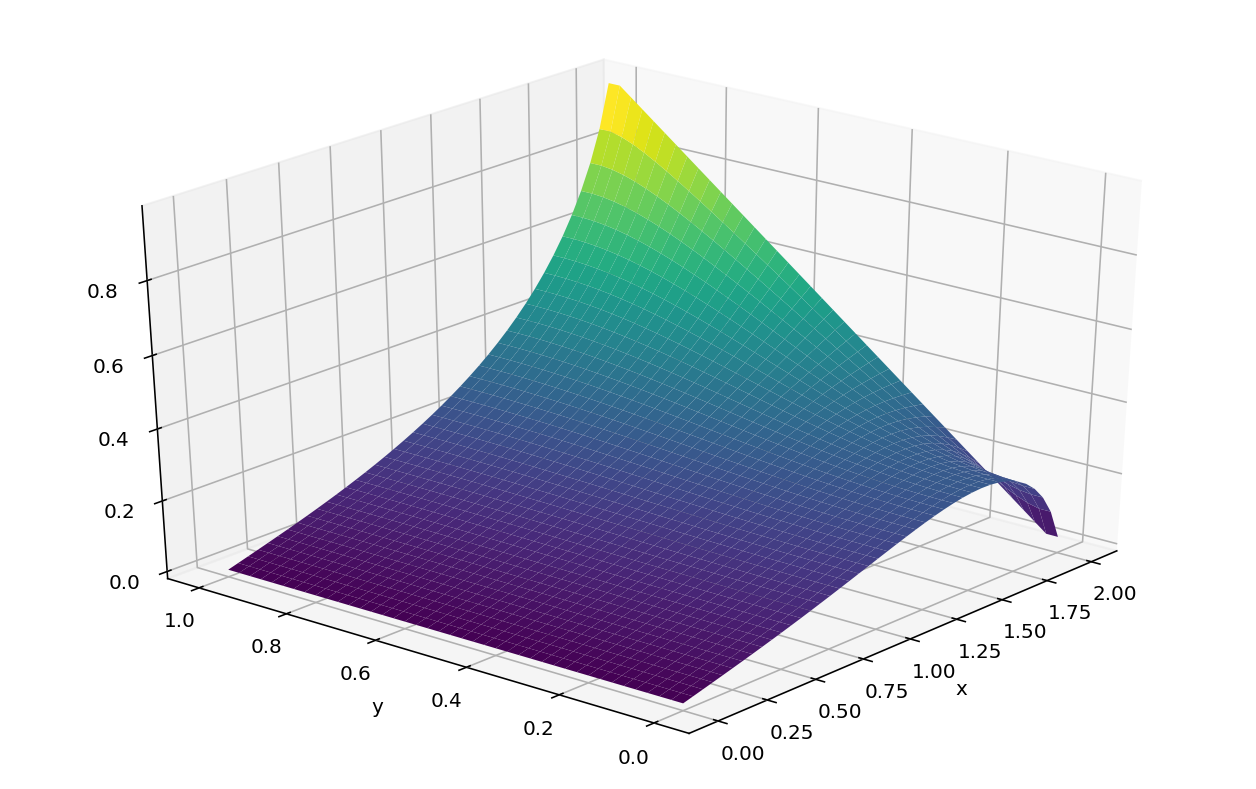

In [6]:
fig= plt.figure(figsize=(11,7))
ax = fig.gca(projection='3d')
init_cond = ax.plot_surface(X, Y, p, cmap=cm.viridis)
ax.view_init(30, 220)
ax.set_xlabel('x')
ax.set_ylabel('y')

This method took over 17 seconds to converge, given our current criteria. Let's now try with array operations.

In [12]:
def laplace():
    # Variable declarations
    nx = 41
    ny = 41
    Lx = 2
    Ly = 1
    dx = Lx / (nx - 1)
    dy = Ly / (ny - 1)
    x = np.linspace(0, Lx, nx)
    y = np.linspace(0, Ly, ny)
    X, Y = np.meshgrid(x, y)
    max_iter = 10000
    l1norm_target = 1e-4
    
    ## MAIN LOOP##
    start = time.time()
    p = np.zeros((ny, nx))
    n = 0
    l1norm = np.inf
    while (l1norm > l1norm_target) & (n < max_iter):
        pn = np.copy(p)
        p[1:-1,1:-1] = (dy**2*(p[1:-1,2:] + p[1:-1, :-2]) + dx**2*(p[2:,1:-1] + p[:-2,1:-1]))/(2*(dx**2+dy**2))
        p[:, 0] = 0           # BC at x = 0
        p[:, -1] = y           # BC at x = 2
        p[0, :] = p[1, :]     # dp/dy = 0 at y = 0 (forward difference)
        p[-1, :] = p[-2, :]   # dp/dy = 0 at y = 1 (backward difference)
        l1norm = (np.sum(np.abs(p[:]) - np.abs(pn[:])))/np.sum(np.abs(pn[:]))
        n += 1
    finish = time.time()
    print(f'Convergence criteria met. Breaking. Final L1 norm: {l1norm:.4f}. Iterations: {n}')
    print(f'Time to run: {finish-start:.2f} seconds')
    fig= plt.figure(figsize=(11,7))
    ax = fig.gca(projection='3d')
    init_cond = ax.plot_surface(X, Y, p, cmap=cm.viridis)
    ax.view_init(30, 220)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

<ipython-input-12-8a696837dfe8>:27: RuntimeWarning: divide by zero encountered in double_scalars
  l1norm = (np.sum(np.abs(p[:]) - np.abs(pn[:])))/np.sum(np.abs(pn[:]))


Convergence criteria met. Breaking. Final L1 norm: 0.0001. Iterations: 2813
Time to run: 0.14 seconds


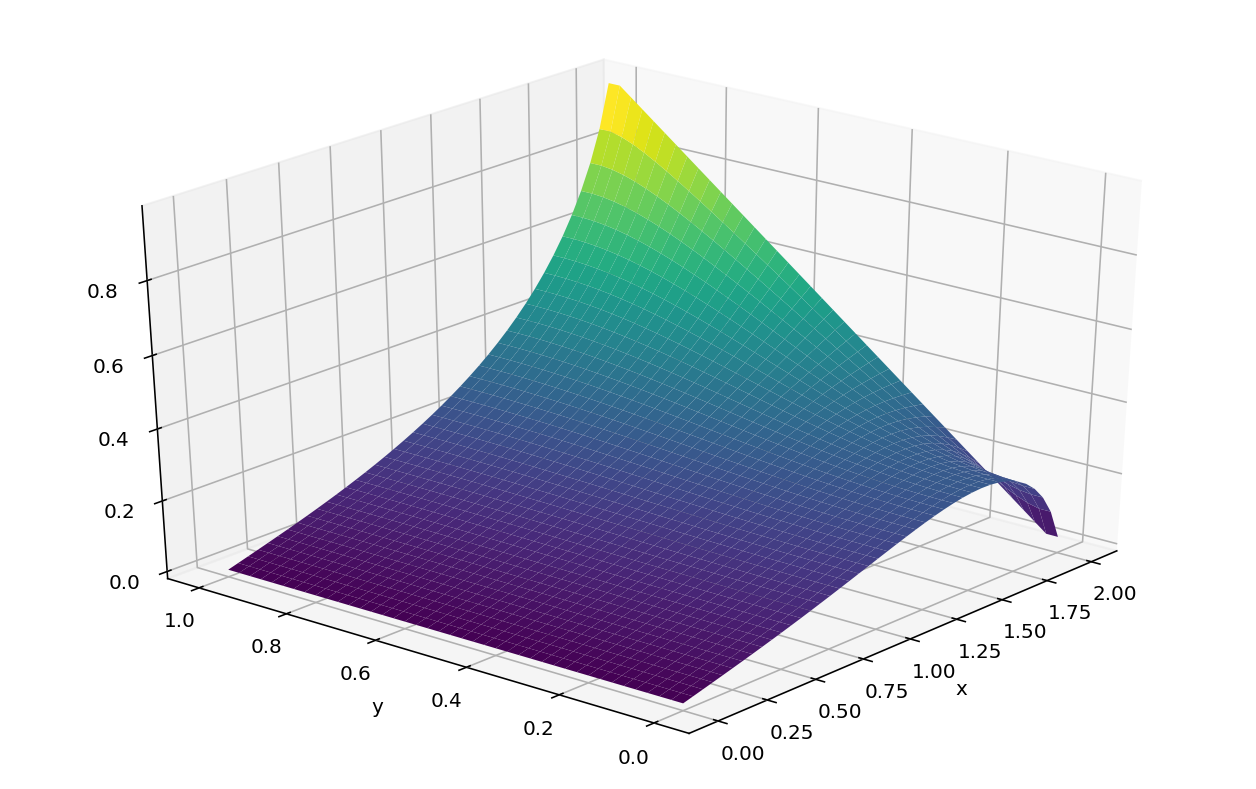

In [13]:
laplace()